In [1]:
#Many U.S. cities have bike sharing stations, where bikes can be rented by the hour or day.
#We will be working with data on bike rentals in Washington D.C.

#Our objective is to try to predict the total number of bikes people rent in a given hour based 
#on factors such as temperature, month, whether its a holiday or not etc.

#In this project, the emphasis will be on trying different machine learning models and optimising 
#their parameters, in order to achieve the most accurate results.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
bike_rentals = pd.read_csv("hour.csv")

In [4]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
#the column descriptions can be found here: http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#

(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

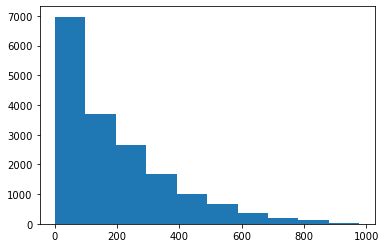

In [6]:
plt.hist(bike_rentals["cnt"]) #distribution of cnt (total n. bike rentals)

In [7]:
#We can do some work with our features to enhance the accuracy of our models.
#For example the hour column contains values from 1 to 24. We can group this information better by
#creating new column labels  such as morning, afternoon, evening and night.

In [8]:
def assign_label(h):
    if h >= 6 and h < 12:
        return 1
    elif h >= 12 and h< 18:
        return 2
    elif h >= 18 and h <= 24:
        return 3
    elif h >= 0 and h < 6:
        return 4
    
bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)    


In [9]:
#No we can begin preparing our data to be used with machine learning algorithms.

In [10]:
#train/test split

train = bike_rentals.sample(frac = 0.8)
test = bike_rentals[~bike_rentals.index.isin(train.index)]

In [11]:
#Model Selection Stage.
#Here we discuss and try different ml models to find the most appropriate model.

In [12]:
#Linear Regression
#To see if using linear regression is appropriate for this data, we look at how our columns correlate
#with the target column (cnt). 

#Linear regression is used when columns are linearly correlated with with the target column, however
#linear models are prone to underfitting (not describing the actual relationships between columns by 
#oversimplifying them).

bike_rentals.corr()["cnt"] #looking at how each column is correlated with cnt (total n. bike rentals)


instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
time_label   -0.378318
Name: cnt, dtype: float64

In [13]:
#Ignoring the casual and registered columns which will not be used in our analysis (since they already 
#tell the model how many people use the bikes in a given hour), we have some columns that correlate
#quite highly with the cnt column.

#This means we could try linear regression.

#Creating a list of predictor columns.
train_cols = list(bike_rentals)
#remove some columns initially.
train_cols.remove("cnt")
train_cols.remove("casual")
train_cols.remove("registered")
train_cols.remove("dteday")
train_cols.remove("atemp")

target = train["cnt"]

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

In [14]:
train_cols

['instant',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'hum',
 'windspeed',
 'time_label']

In [20]:
def lr_train_test(train_col, train, test):
    np.random.seed(101)
    
    lr = LinearRegression()
    
    lr.fit(train[train_col], train["cnt"])
    prediction_lr = lr.predict(test[train_col])
    
    mse = mean_squared_error(test["cnt"], prediction_lr)

    return mse

In [21]:
lr_train_test(train_cols, train, test) #the error is very high, indicating that the model
#is an underfit, which was mentioned as one of the drawbacks of linear regression.

16955.253895482252

In [19]:
#Decision Tree
#Decision trees tend to be more reliable ml models, as they are able to capture non-linear
#relationships between our variables. 

#They also tend to be quite sensitive, meaning they are greatly affected by noise, and as a result
#they are prone to overfitting.

from sklearn.tree import DecisionTreeRegressor

In [24]:
def tree_train_test(train_col, train, test):
    np.random.seed(101)
    
    tree = DecisionTreeRegressor()
    
    tree.fit(train[train_col], train["cnt"])
    prediction_tree = tree.predict(test[train_col])
    
    mse = mean_squared_error(test["cnt"], prediction_tree)

    return mse

In [25]:
tree_train_test(train_cols, train, test)

3334.4024741081703

In [ ]:
#The decision tree model with default parameters performs much better than the linear regression 
#model as evident by the much smaller value of mse.

#Perhaps it is possible to improve the model by optimising some of its parameters.

In [26]:
def tree_train_test(train_col, train, test, def_min_samples_leaf = 5):
    np.random.seed(101)
    
    tree = DecisionTreeRegressor(min_samples_leaf = def_min_samples_leaf)
    
    tree.fit(train[train_col], train["cnt"])
    prediction_tree = tree.predict(test[train_col])
    
    mse = mean_squared_error(test["cnt"], prediction_tree)

    return mse

In [34]:
mses = {}
for i in range(1,15):
    mses[i] = tree_train_test(train_cols, train, test, def_min_samples_leaf=i)
mses    

{1: 3334.4024741081703,
 2: 2824.767612837233,
 3: 2703.3289930155993,
 4: 2587.8314488514047,
 5: 2528.433272036895,
 6: 2595.4851416106867,
 7: 2600.281147004168,
 8: 2579.433352238942,
 9: 2634.3991955764864,
 10: 2638.4552130041516,
 11: 2648.99503621641,
 12: 2724.073404802602,
 13: 2762.297642753705,
 14: 2760.997283870724}

In [ ]:
#As we can see, the model performs the best with the min_samples_leaf parameter set at 5.

#Then our model achieves a value of mse roughly equal to 2528 which is a lot better than
#17000 mse, achieved by linear regression.

In [ ]:
#Lets now check if there are signs of overfitting in our Decision tree model.
#The big indicator is usually when a model is tested on the data it was trained on, it tends to 
#perform much better on it than on the testing data.

#This would indicate that a model is paying too much attention to the random noise in the traning set
#as consequently cannot solve the general problem as well.

In [35]:
def tree_train_test_check(train_col, train, test, def_min_samples_leaf = 5):
    np.random.seed(101)
    
    tree = DecisionTreeRegressor(min_samples_leaf = def_min_samples_leaf)
    
    tree.fit(train[train_col], train["cnt"])
    prediction_tree = tree.predict(train[train_col])
    
    mse = mean_squared_error(train["cnt"], prediction_tree)

    return mse

In [36]:
mses = {}
for i in range(1,15):
    mses[i] = tree_train_test_check(train_cols, train, test, def_min_samples_leaf=i)
mses    

{1: 0.0,
 2: 329.06759931909187,
 3: 636.7134623222806,
 4: 859.9895217887198,
 5: 1073.592044368636,
 6: 1225.9137364956684,
 7: 1363.1425185334379,
 8: 1472.2768031703765,
 9: 1568.5974562004199,
 10: 1661.2918409947918,
 11: 1736.0997058355708,
 12: 1816.1084535062641,
 13: 1870.202656622492,
 14: 1964.9972557349863}

In [ ]:
#As expected, the model performs much better on the train set, indicating that overfitting is 
#taking place.

In [37]:
#Random Forest Regressor
#random forests are collections of decision trees, with slightly altered parameters, which makes them
#really accurate and also less prone to overfitting.

#One disadvantage of random forest algorithms is that they tend to be computationally expensive.
#Constructing a random forest with 2 trees, takes twice as long as the decision tree algorithm,
#and random forests usually consist of tens of trees.
from sklearn.ensemble import RandomForestRegressor

In [41]:
def forest_train_test(train_col, train, test):
    np.random.seed(101)
    
    rf = RandomForestRegressor()
    
    rf.fit(train[train_col], train["cnt"])
    prediction_rf = rf.predict(test[train_col])
    
    mse = mean_squared_error(test["cnt"], prediction_rf)

    return mse

In [42]:
forest_train_test(train_cols, train, test) #mse with default parameters.

1625.6495998849252

In [ ]:
#lets perform some parameter optimisation of the model.

In [43]:
def forest_train_test(train_col, train, test, def_min_samples_leaf = 1, def_n_estimators = 200):
    np.random.seed(101)
    
    rf = RandomForestRegressor(min_samples_leaf = def_min_samples_leaf, 
                               n_estimators = def_n_estimators)
    
    rf.fit(train[train_col], train["cnt"])
    prediction_rf = rf.predict(test[train_col])
    
    mse = mean_squared_error(test["cnt"], prediction_rf)

    return mse

In [44]:
mses = {}
for i in range(1,15):
    mses[i] = forest_train_test(train_cols, train, test, def_min_samples_leaf=i)
mses    

{1: 1618.5442035457422,
 2: 1640.561528205265,
 3: 1701.6152002980284,
 4: 1766.477215599489,
 5: 1828.675766380393,
 6: 1887.3095481138616,
 7: 1947.0436142836168,
 8: 2007.368500681667,
 9: 2059.5154396805997,
 10: 2108.2754406197064,
 11: 2154.739365463783,
 12: 2206.9101456167127,
 13: 2254.8178587471034,
 14: 2299.6578071122035}

In [ ]:
#As we can see, the random forest performs best with the min_samples_leaf parameter set at 1.
#Then the model performs the most accurate result of 1618 mse, lower than any other error produced
#by the models tested above.